#### Geospatial and Location-Based Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to dataset CSV (update as needed)
dataset_path = "/content/drive/MyDrive/Colab Notebooks/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv"
accidents_df = pd.read_csv(dataset_path)
print(f'Dataset loaded successfully with shape: {accidents_df.shape}')

Dataset loaded successfully with shape: (7728394, 46)


In [ ]:
# Convert coordinates to numeric (if not already)
accidents_df['Start_Lat'] = pd.to_numeric(accidents_df['Start_Lat'], errors='coerce')
accidents_df['Start_Lng'] = pd.to_numeric(accidents_df['Start_Lng'], errors='coerce')

In [ ]:
# Drop rows with missing coordinates for geospatial analysis.
geo_df = accidents_df.dropna(subset=['Start_Lat', 'Start_Lng'])

geo_df.shape

(7728394, 46)

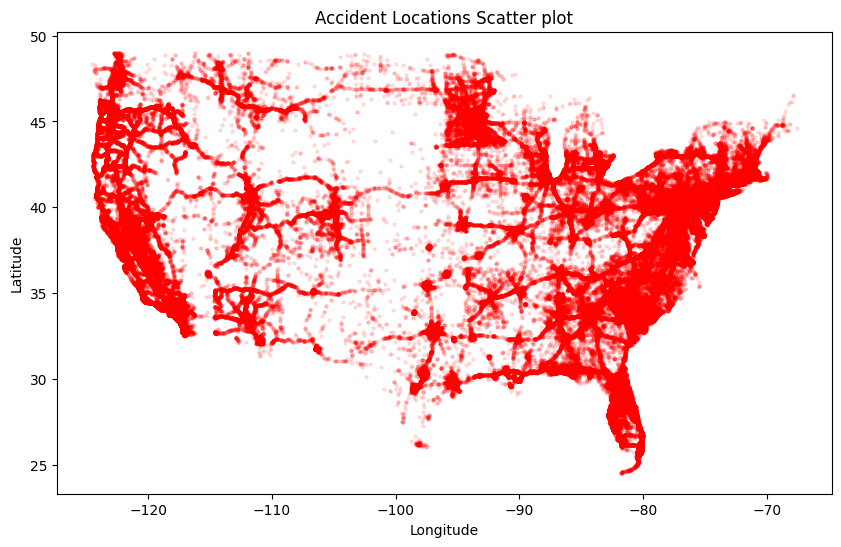

In [ ]:
# Visualize accidents hotspots - scatter plot for all points (sample due to size)
plt.figure(figsize=(10, 6))
sample_df = geo_df.sample(n=1000000, random_state=42) # sampling for performance
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipython-input-846502576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')


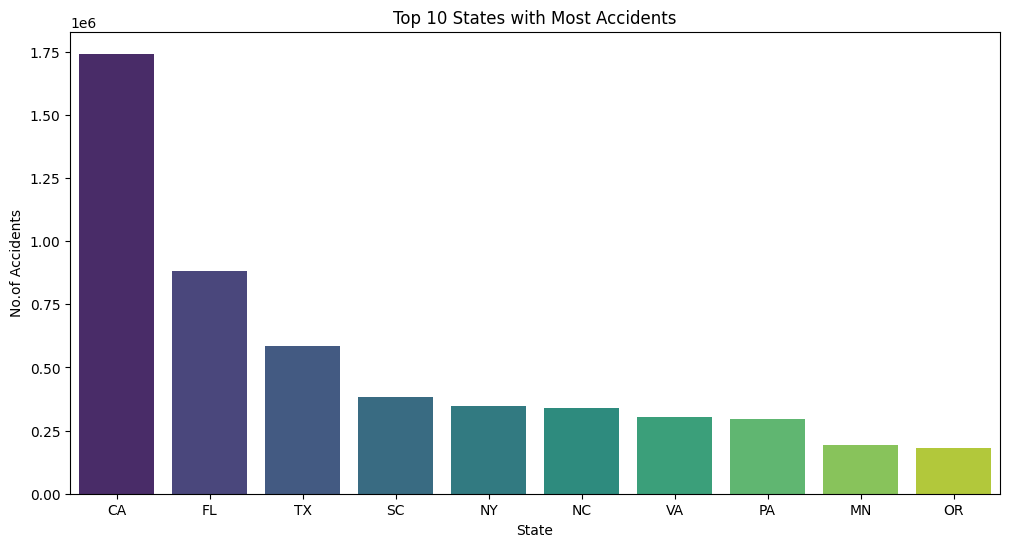

In [ ]:
# Density map by State (accident count per state)
state_counts = geo_df['State'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')
plt.title('Top 10 States with Most Accidents')
plt.xlabel('State')
plt.ylabel('No.of Accidents')
plt.show()


/tmp/ipython-input-3294789569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


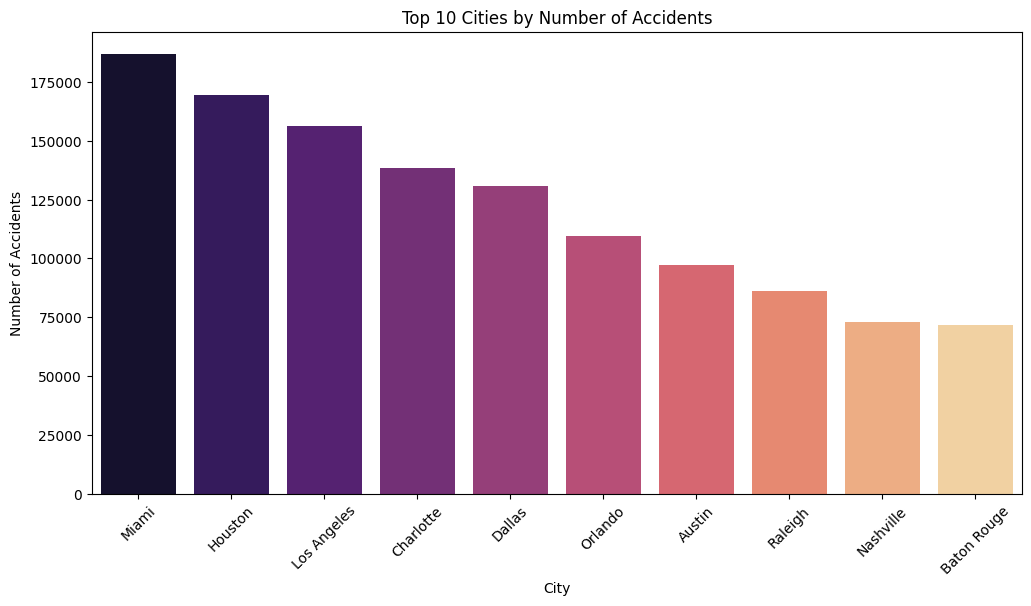

In [ ]:
# Density map by City (accident count for top 10 cities)
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Highlight top 5 most accident-prone states and cities
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)


Top 5 Accident-Prone States:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64


### EDA Q/A

**Q1**. What is the distribution of accidents by Hour of the Day?

/tmp/ipython-input-2923117819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=accidents_df, palette='coolwarm')


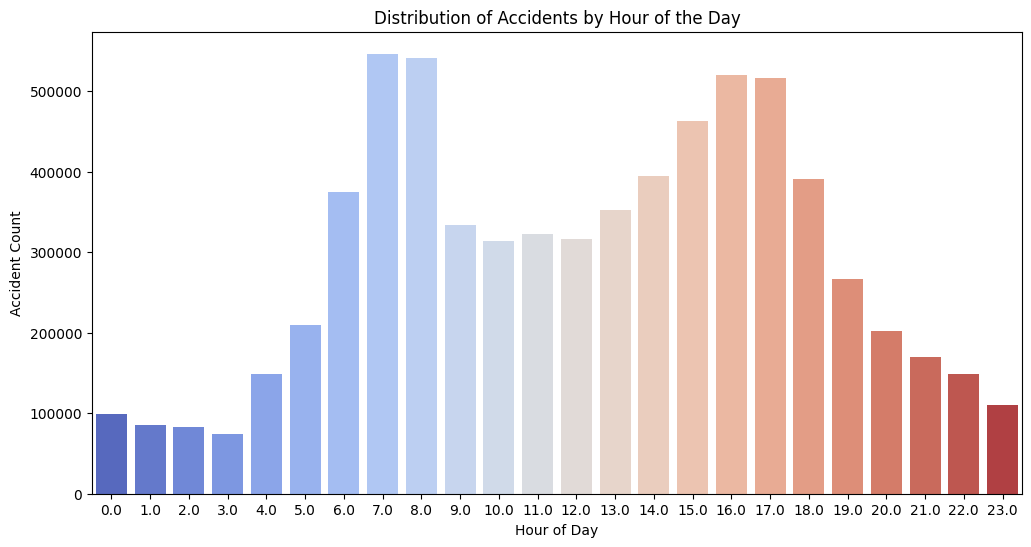

In [ ]:
# Convert Start_Time to datetime
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')

# Extract hour
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=accidents_df, palette='coolwarm')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Count')
plt.show()

**Q2**. How does accident severity distribute across different States?

/tmp/ipython-input-3570377582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_state.index, y=severity_state.values, palette="viridis")


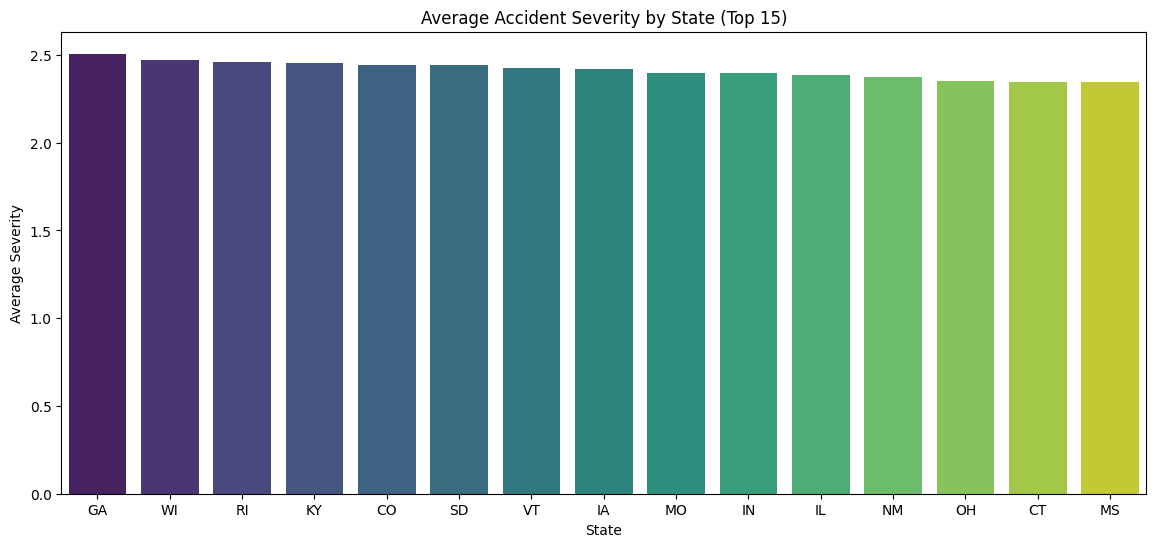

In [ ]:
plt.figure(figsize=(14,6))
severity_state = accidents_df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(15)

sns.barplot(x=severity_state.index, y=severity_state.values, palette="viridis")
plt.title('Average Accident Severity by State (Top 15)')
plt.xlabel('State')
plt.ylabel('Average Severity')
plt.show()

**Q3**. What weather conditions are associated with the highest accident severity?

/tmp/ipython-input-1852121228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_severity.index, y=weather_severity.values, palette='rocket')


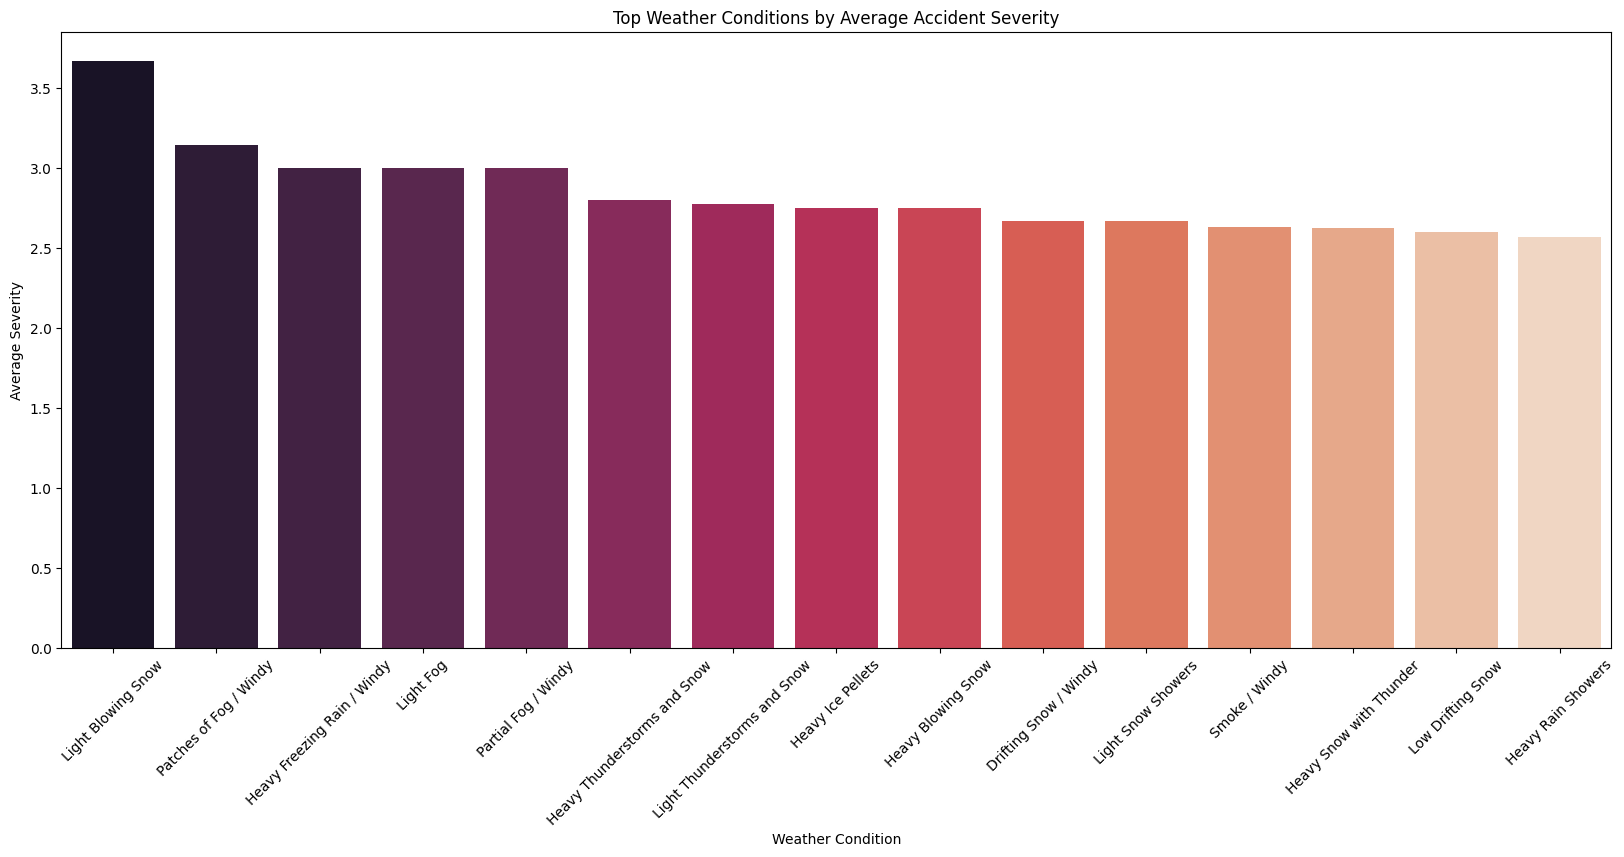

In [ ]:
weather_severity = accidents_df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(20,8))
sns.barplot(x=weather_severity.index, y=weather_severity.values, palette='rocket')
plt.xticks(rotation=45)
plt.title('Top Weather Conditions by Average Accident Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Average Severity')
plt.show()

**Q4**. How many accidents occur during day vs night? (Sunrise_Sunset column)

/tmp/ipython-input-918227748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sunrise_Sunset', data=accidents_df, palette='Set2')


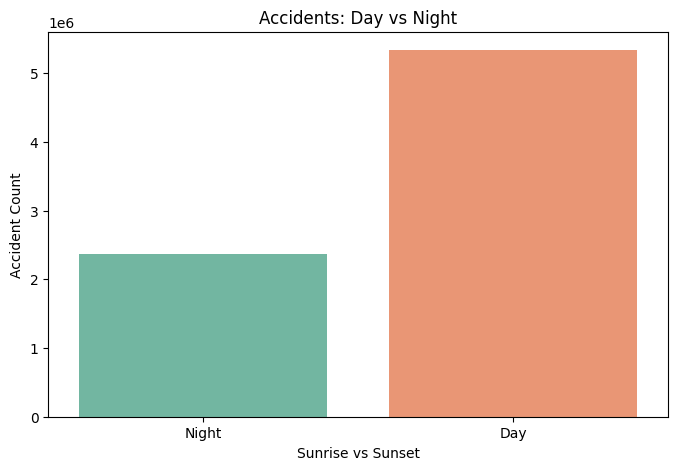

,count
Sunrise_Sunset,
Day,5334553
Night,2370595


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sunrise_Sunset', data=accidents_df, palette='Set2')
plt.title('Accidents: Day vs Night')
plt.xlabel('Sunrise vs Sunset')
plt.ylabel('Accident Count')
plt.show()

accidents_df['Sunrise_Sunset'].value_counts()

**Q5**. Distribution of accidents on different days of the week

/tmp/ipython-input-649679646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=accidents_df,


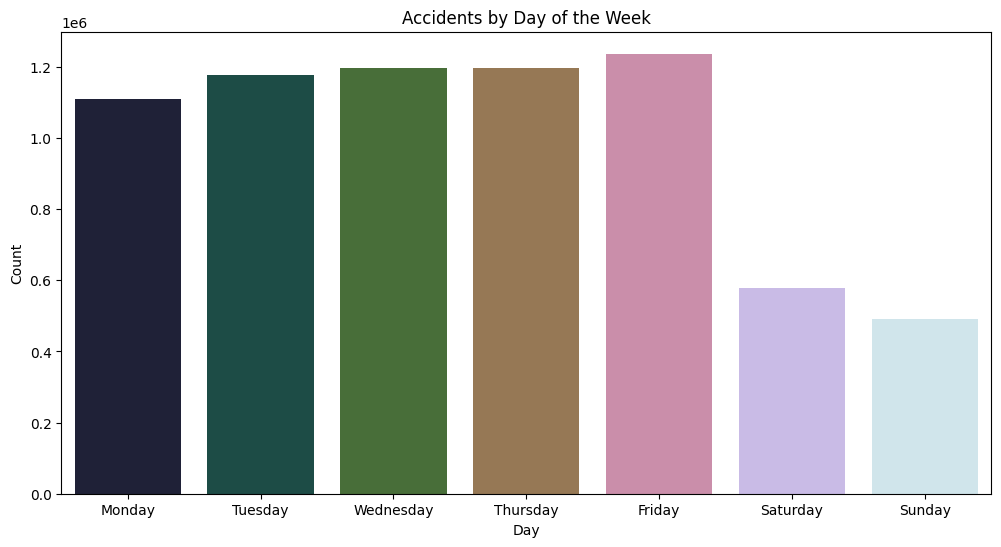

In [ ]:
# Create Day of Week
accidents_df['Day_of_Week'] = accidents_df['Start_Time'].dt.day_name()

plt.figure(figsize=(12,6))
sns.countplot(x='Day_of_Week', data=accidents_df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              palette='cubehelix')

plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

**Q6**. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing) associated with accident counts?

/tmp/ipython-input-2452431957.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='plasma')


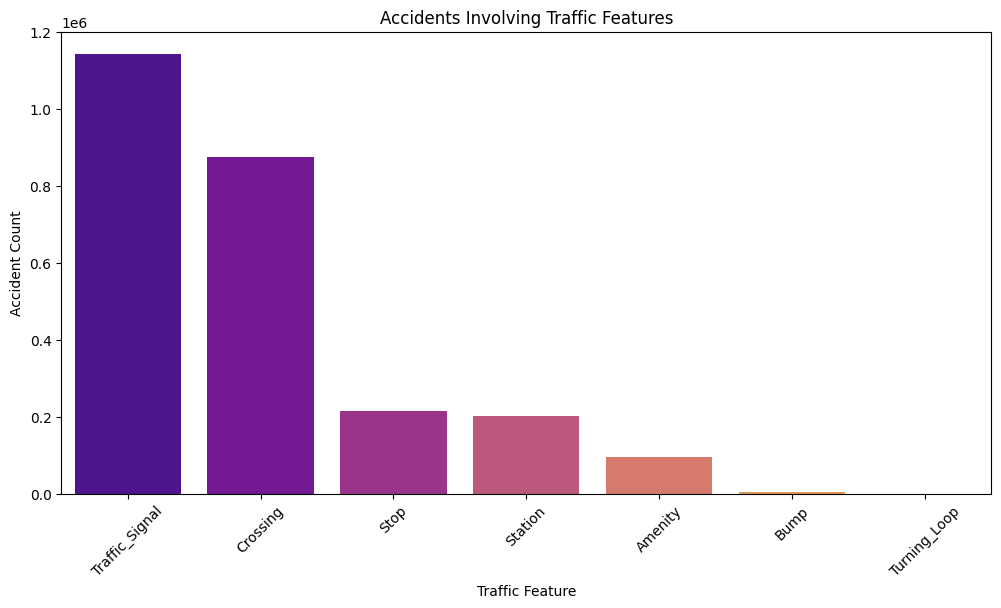

,0
Traffic_Signal,1143772
Crossing,873763
Stop,214371
Station,201901
Amenity,96334
Bump,3514
Turning_Loop,0


In [ ]:
traffic_cols = ['Traffic_Signal', 'Stop', 'Crossing', 'Station', 'Turning_Loop', 'Amenity', 'Bump']

# Count accidents where feature is True
traffic_counts = accidents_df[traffic_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='plasma')
plt.title('Accidents Involving Traffic Features')
plt.xlabel('Traffic Feature')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

traffic_counts